# Guide for twinpy/analysis/twinboundary_analyzer.py

In [3]:
%aiida
%reload_ext autoreload
%autoreload 2

In [4]:
import os
import numpy as np
from pprint import pprint
from matplotlib import pyplot as plt
import twinpy
from twinpy.interfaces.aiida import (AiidaVaspWorkChain,
                                     AiidaRelaxWorkChain,
                                     AiidaPhonopyWorkChain,
                                     AiidaShearWorkChain,
                                     AiidaTwinBoudnaryRelaxWorkChain,
                                     )
from twinpy.analysis.twinboundary_analyzer import TwinBoundaryAnalyzer
from twinpy.file_io import write_thermal_ellipsoid

jupyter_dir = os.path.join(os.path.dirname(twinpy.__file__), '..', 'jupyter')
sys.path.append(os.path.join(jupyter_dir, 'site-packages'))
from jupyter_help import show_info

hexagonal_relax_pk = 7887  # twinpy
hexagonal_phonon_pk = 289856  # twinpy
twinboundary_pk = 186343  # twinpy
additional_relax_pks = [267977, 279276, 282215, 283951]   # twinpy
twinboundary_phonon_pk = 286877  # twinpy
twinboundary_shear_relax_pks = [326425, 297874, 297890, 297907, 297924]
twinboundary_shear_phonon_pks = [326490, 299318, 300184, 300580, 300760]
shear_strain_ratios = [0.00, 0.02, 0.04, 0.06, 0.08]

# class TwinBoundaryAnalyzer

In [5]:
aiida_twinboundary_relax = AiidaTwinBoudnaryRelaxWorkChain(load_node(twinboundary_pk))
twinboundary_analyzer = aiida_twinboundary_relax.get_twinboundary_analyzer(
                            twinboundary_phonon_pk=twinboundary_phonon_pk,
                            hexagonal_relax_pk=hexagonal_relax_pk,
                            hexagonal_phonon_pk=hexagonal_phonon_pk,
                            additional_relax_pks=additional_relax_pks)
show_info(twinboundary_analyzer, is_class=True)

/home/mizo/src/github.com/kei0822kei/twinpy/twinpy/interfaces/aiida/base.py:105: UserWarning: process state: excepted
  warnings.warn("process state: %s" % self._process_state)
/home/mizo/src/github.com/kei0822kei/twinpy/twinpy/interfaces/aiida/vasp.py:309: UserWarning: Final structure could not find.
process state:excepted (pk=279276)
  self.process_state, self._node.pk))
/home/mizo/src/github.com/kei0822kei/twinpy/twinpy/interfaces/aiida/vasp.py:371: UserWarning: Could not find final static_pk calculation.
  warnings.warn("Could not find final static_pk calculation.")
/home/mizo/src/github.com/kei0822kei/twinpy/twinpy/interfaces/aiida/vasp.py:212: UserWarning: Final structure could not find.
process state:excepted (pk=281156)
  self.process_state, self._node.pk))


====== START class information ======

# ---------
# docstring
# ---------

    Analyze shear result.
    

# ----
# init
# ----

        Args:
            twinboundary_structure:TwinBoundaryStructure object.
            hexagonal_phonon_analyzer: PhononAnalyzer class object.
            twinboundary_phonon_analyzer: PhononAnalyzer class object.
        

# ---------------
# attribute names
# ---------------
['_twinboundary_structure',
 '_relax_analyzer',
 '_phonon_analyzer',
 '_hexagonal_relax_analyzer',
 '_hexagonal_phonon_analyzer',
 '_standardize']

# ------
# values
# ------
{'_hexagonal_phonon_analyzer': <twinpy.analysis.phonon_analyzer.PhononAnalyzer object at 0x7f5b3071d250>,
 '_hexagonal_relax_analyzer': <twinpy.analysis.relax_analyzer.RelaxAnalyzer object at 0x7f5b307ab950>,
 '_phonon_analyzer': <twinpy.analysis.phonon_analyzer.PhononAnalyzer object at 0x7f5b3082c690>,
 '_relax_analyzer': <twinpy.analysis.relax_analyzer.RelaxAnalyzer object at 0x7f5b307d3bd0>,
 '_standardize'

## def get_formation_energy

In [7]:
show_info(twinboundary_analyzer.get_formation_energy)
print(twinboundary_analyzer.get_formation_energy())

====== START method information ======

# ---------
# docstring
# ---------

        Get formation energy. Unit [mJ/m^(-2)]

        Args:
            use_relax_lattice (bool): If True, relax lattice is used.
        

======= END method information =======


134.09398891226695


## def get_shear_cell

In [8]:
show_info(twinboundary_analyzer.get_shear_cell)
original_cells = []
for ratio in shear_strain_ratios:
    original_cell = twinboundary_analyzer.get_shear_cell(
        shear_strain_ratio=ratio,
        is_standardize=False)
    original_cells.append(original_cell)
original_cells[1]

====== START method information ======

# ---------
# docstring
# ---------

        Get shear introduced twinboundary cell.

        Args:
            shear_strain_ratio (float): shear strain ratio
            is_standardize (bool): if True, get standardized cell

        Returns:
            tuple: shear introduced cell

        Notes:
            original relax cell is use to create shear cell which is a little
            bit different shear value with respect to bulk shear value
            but I expect this is neglectable.
        

======= END method information =======




(array([[ 3.19290368e+00, -2.25468063e-09, -2.82290305e-16],
        [ 5.30689606e-09,  7.51521423e+00,  6.95899329e-48],
        [ 7.71366483e-11,  1.09229771e-01,  4.12338767e+01]]),
 array([[0.5       , 0.18987817, 0.        ],
        [0.5       , 0.77415617, 0.        ],
        [0.5       , 0.67037014, 0.09686977],
        [0.5       , 0.2565298 , 0.08491331],
        [0.        , 0.95006954, 0.05376716],
        [0.        , 0.49517744, 0.03823999],
        [0.5       , 0.13946881, 0.18920264],
        [0.5       , 0.72643571, 0.17437966],
        [0.        , 0.40759767, 0.14407153],
        [0.        , 0.98910516, 0.12922242],
        [0.5       , 0.60767731, 0.28013463],
        [0.5       , 0.19460888, 0.26528512],
        [0.        , 0.87366838, 0.23471488],
        [0.        , 0.46059995, 0.21986537],
        [0.5       , 0.0791721 , 0.37077758],
        [0.5       , 0.66067959, 0.35592847],
        [0.        , 0.34184155, 0.32562034],
        [0.        , 0.92880845, 

## def get_twinboudnary_shear_analyzer

In [9]:
show_info(twinboundary_analyzer.get_twinboundary_shear_analyzer)
phonon_analyzers = []
for i in range(len(original_cells)):
    aiida_relax = AiidaRelaxWorkChain(load_node(twinboundary_shear_relax_pks[i]))
    relax_analyzer = aiida_relax.get_relax_analyzer(original_cell=original_cells[i])
    aiida_phonon = AiidaPhonopyWorkChain(load_node(twinboundary_shear_phonon_pks[i]))
    phonon_analyzer = aiida_phonon.get_phonon_analyzer(relax_analyzer=relax_analyzer)
    phonon_analyzers.append(phonon_analyzer)

twinboundary_shear_analyzer = \
    twinboundary_analyzer.get_twinboundary_shear_analyzer(
        shear_phonon_analyzers=phonon_analyzers,
        shear_strain_ratios=shear_strain_ratios)
print(twinboundary_shear_analyzer)

====== START method information ======

# ---------
# docstring
# ---------

        Get TwinBoundaryShearAnalyzer class object.

        Args:
            shear_phonon_analyzers (list): List of additional shear
                                           phonon analyzers.
        

======= END method information =======




## def get_atomic_environment

In [32]:
show_info(twinboundary_analyzer.get_atomic_environment)
atomic_envs = twinboundary_analyzer.get_atomic_environment()
pprint(atomic_envs)

====== START method information ======

# ---------
# docstring
# ---------

        Get plane coords from lower plane to upper plane.
        Return list of z coordinates of original cell frame.
        Plane coordinates (z coordinates) are fractional.

        Returns:
            tuple: First and second element are for initial and final cell
                   respectively. Each contains (planes, distances, angles)
        

======= END method information =======


[([0.0,
   1.87740593,
   3.75481145,
   5.63221738,
   7.50962332,
   9.38702842,
   11.26443435,
   13.14184028,
   15.0192458,
   16.89665174,
   18.77405767,
   20.65146319,
   22.5288687,
   24.40627464,
   26.28368057,
   28.16108609,
   30.03849202,
   31.91589795,
   33.79330306,
   35.67070899,
   37.54811492,
   39.42552044],
  [1.87740593,
   1.8774055200000002,
   1.8774059300000001,
   1.87740594,
   1.8774050999999998,
   1.8774059300000001,
   1.8774059300000001,
   1.87740552,
   1.8774059399999992,
   1.8

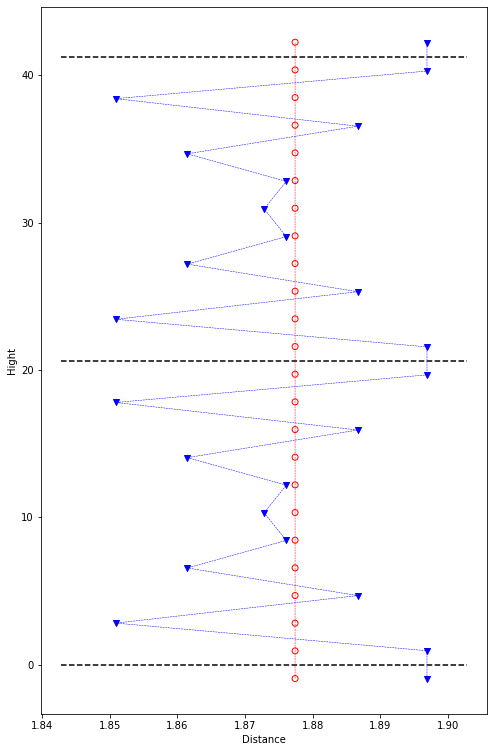

In [33]:
fig = twinboundary_analyzer.plot_plane_diff()

## def plot_angle_diff

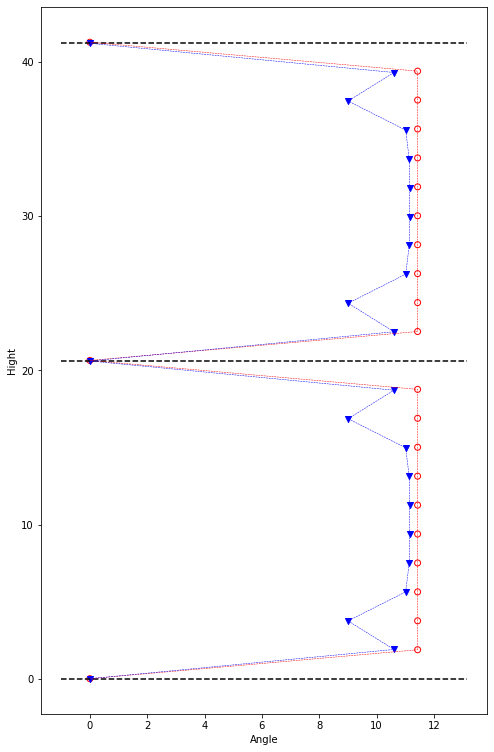

In [34]:
fig = twinboundary_analyzer.plot_angle_diff()

## def plot_atom_diff

The length of a axis is changed, so x in 'shuffle=False' does not zero


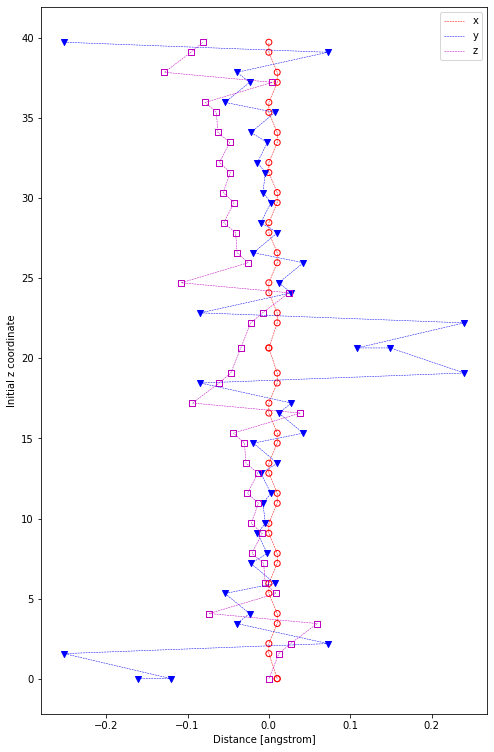

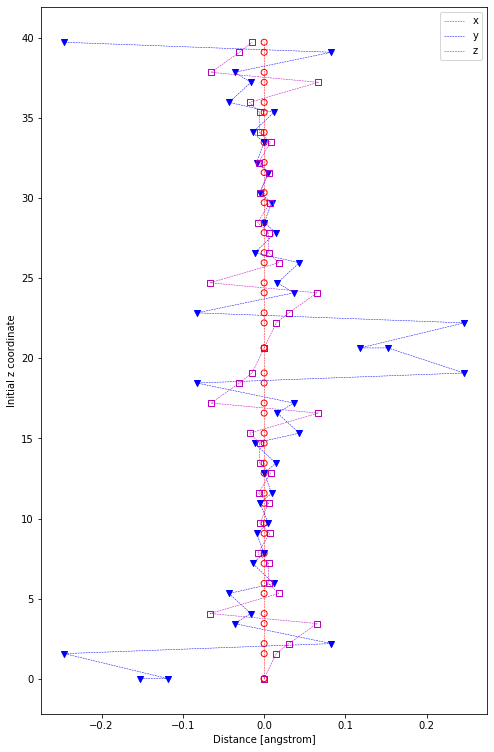

In [57]:
twinboundary_analyzer.plot_atom_diff(shuffle=False)
twinboundary_analyzer.plot_atom_diff(shuffle=True)
print("The length of a axis is changed, so x in 'shuffle=False' does not zero")